# Exercises

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud
import acquire as a
import prepare as prep
import explore as ex

In [2]:
def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df

### 1.Spam Data

- a. Load the spam data set.

In [3]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = prep.prepare_data(df, 'text', ['i','she', 'he', 'you'])

In [5]:
df.head()

,label,text,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


**- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

In [6]:
ham_words =' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)


In [7]:
ham_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune im gonna home soon dont want talk stuff anymore tonight k ive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching eh u remember 2 spell name yes v naughty make v wet fine thats way u feel thats way gota b seriously spell name im going try 2 month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left

In [8]:
#get frequencies
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
#create a table
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,457,13,470
get,314,83,397
2,305,173,478
ltgt,276,0,276


**spam_bigrams**

In [10]:
#spam_words

In [11]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))

In [12]:
spam_bigrams.head()

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object

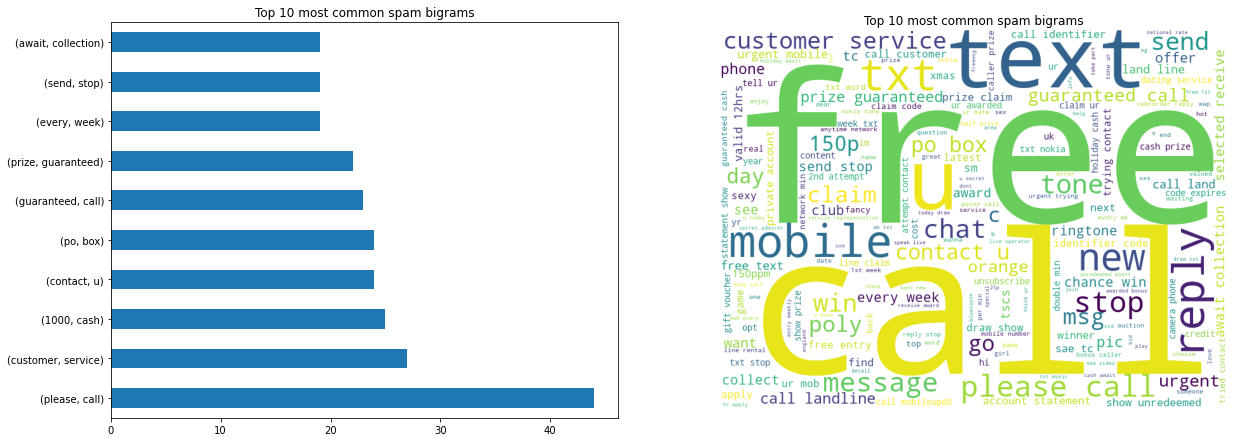

In [13]:
#plot just for one
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
spam_bigrams.value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')
plt.subplot(2,2,2)
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 10 most common spam bigrams')
#plt.tight_layout()
plt.show()

In [14]:
# def ngrams_wordcloud (text_list, title_list , n = 2 ):
#     '''
#     takes in a list of text as a string and a list of titles
#     '''
#     for i in  range (0, len(text_list)):
#         plt.figure(figsize=(20,16))
#         plt.subplot(2,2,1)
#         pd.Series(nltk.ngrams(text_list[i].split(), n= n)).value_counts().head(10).plot.barh()
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         plt.subplot(2,2,2)
#         img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
#         plt.imshow(img)
#         plt.axis('off')
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         #plt.tight_layout()
#         plt.show()

In [15]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

In [16]:
#text_list= [spam_words, ham_words]

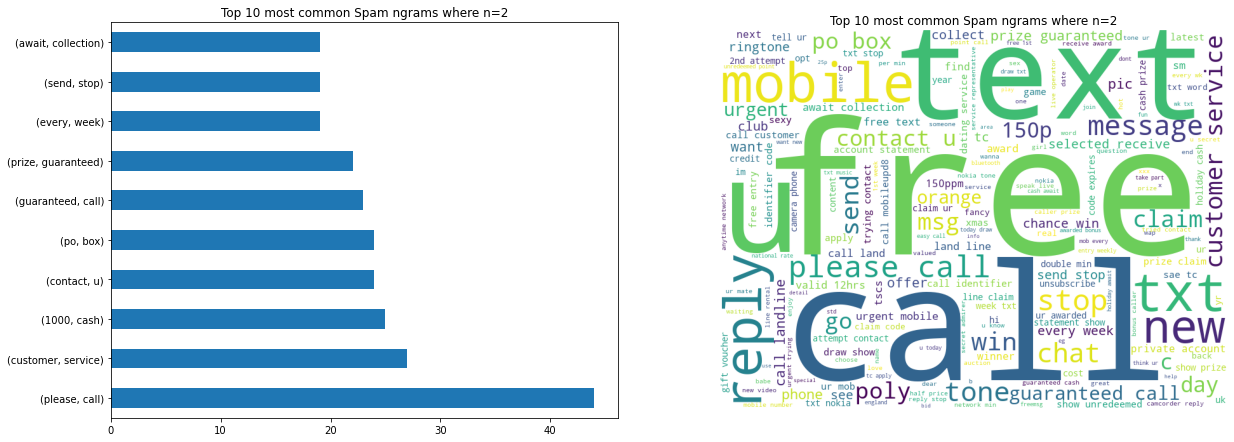

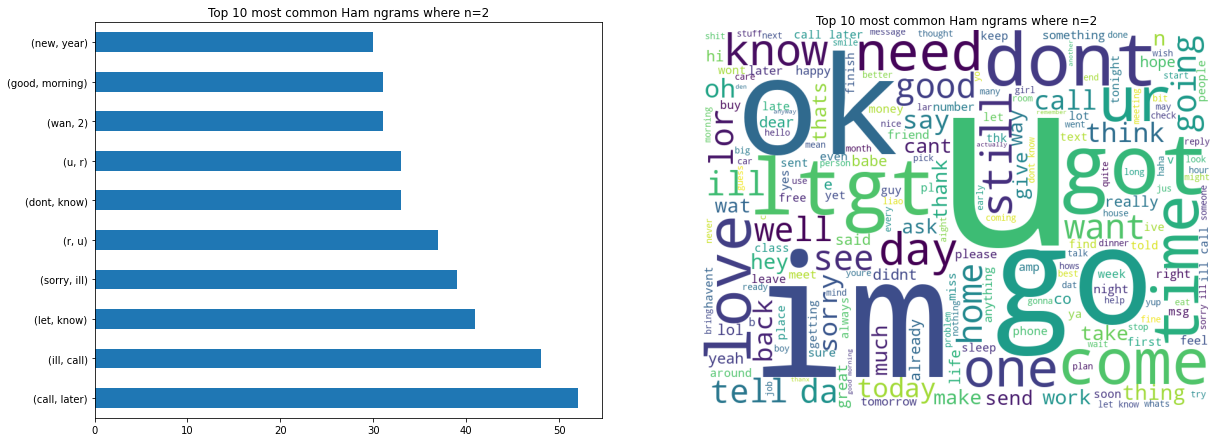

In [17]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'])

c. Is there any overlap in the bigrams for the spam data and the ham data?


***d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.***

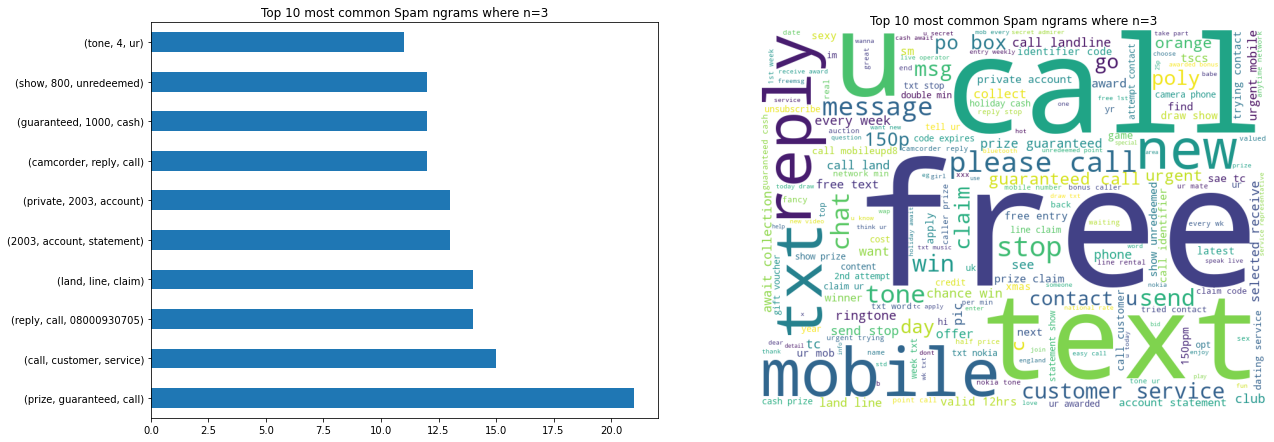

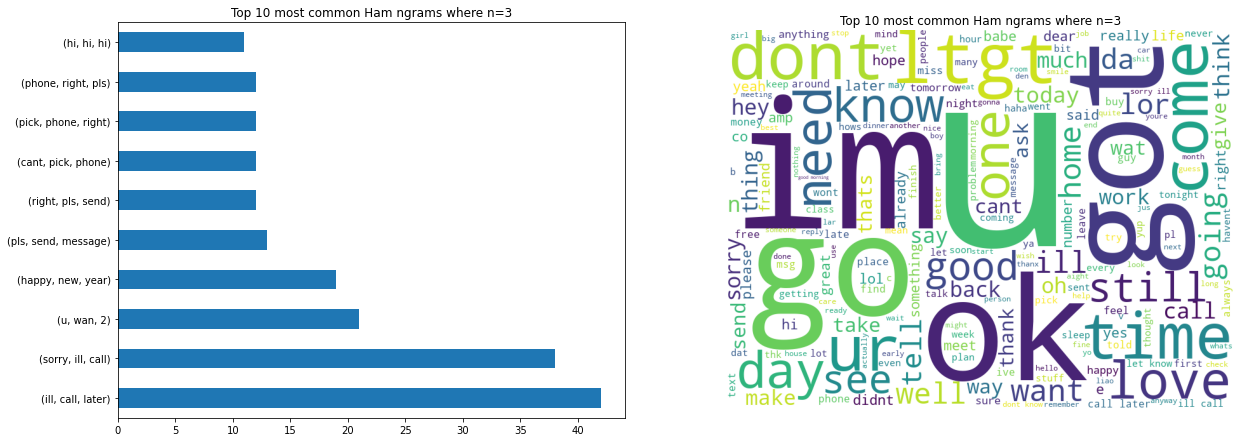

In [18]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'], n=3)

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [19]:
categories = ["business", "sports", "technology", "entertainment", "science", "world"]
news_df = a.get_all_news_articles(categories)

In [21]:
news_df.head()

,title,content,category
0,PM Modi launches e-RUPI digital voucher-based ...,Prime Minister Narendra Modi on Monday launche...,business
1,Fire at Tesla's battery megapack in Australia ...,The fire at a Tesla battery megapack in Austra...,business
2,"High GST, acquisition cost slowing down car de...",Maruti Suzuki India Chairman RC Bhargava said ...,business
3,"Nykaa files papers to raise ₹4,000 crore throu...",Beauty unicorn Nykaa has filed its draft red h...,business
4,Govt rules out slashing of import duties on EV...,India has said it isn't planning to cut import...,business


In [44]:
 news_df=prep.prepare_data(news_df, 'content', ['said'])

In [45]:
news_df.head()

,title,content,category,clean,stemmed,lemmatized
0,PM Modi launches e-RUPI digital voucher-based ...,Prime Minister Narendra Modi on Monday launche...,business,prime minister narendra modi monday launched e...,prime minist narendra modi monday launch erupi...,prime minister narendra modi monday launched e...
1,Fire at Tesla's battery megapack in Australia ...,The fire at a Tesla battery megapack in Austra...,business,fire tesla battery megapack australia declared...,fire tesla batteri megapack australia declar c...,fire tesla battery megapack australia declared...
2,"High GST, acquisition cost slowing down car de...",Maruti Suzuki India Chairman RC Bhargava said ...,business,maruti suzuki india chairman rc bhargava high ...,maruti suzuki india chairman rc bhargava high ...,maruti suzuki india chairman rc bhargava high ...
3,"Nykaa files papers to raise ₹4,000 crore throu...",Beauty unicorn Nykaa has filed its draft red h...,business,beauty unicorn nykaa filed draft red herring p...,beauti unicorn nykaa file draft red her prospe...,beauty unicorn nykaa filed draft red herring p...
4,Govt rules out slashing of import duties on EV...,India has said it isn't planning to cut import...,business,india isnt planning cut import duties electric...,india isnt plan cut import duti electr vehicl ...,india isnt planning cut import duty electric v...


In [46]:
# change value counts to list of languages
list_cat = list(news_df.category.value_counts().index)

In [47]:
list_cat

['entertainment', 'technology', 'sports', 'world', 'business', 'science']

In [48]:
# join all the text of each categotyb
join_text ={}
for cat in list_cat :
    join_text[cat] = prep.basic_clean(' '.join(news_df[news_df.category == cat].lemmatized))

# add all words 
join_text['all_words']= prep.basic_clean(' '.join(news_df.lemmatized))

In [49]:
join_text.keys()

dict_keys(['entertainment', 'technology', 'sports', 'world', 'business', 'science', 'all_words'])

In [50]:

# create a word_count df
word_counts= pd.DataFrame()
for cat in join_text:
    word_counts[cat] = pd.Series(join_text[cat].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [51]:
word_counts.head()

,entertainment,technology,sports,world,business,science,all_words
film,18,0,0,0,0,0,18
actor,15,0,0,0,0,0,15
actress,13,0,0,0,0,0,13
wrote,11,2,0,0,1,1,15
added,7,3,10,4,5,2,31


In [52]:

import matplotlib as mpl

<Figure size 1440x1080 with 0 Axes>

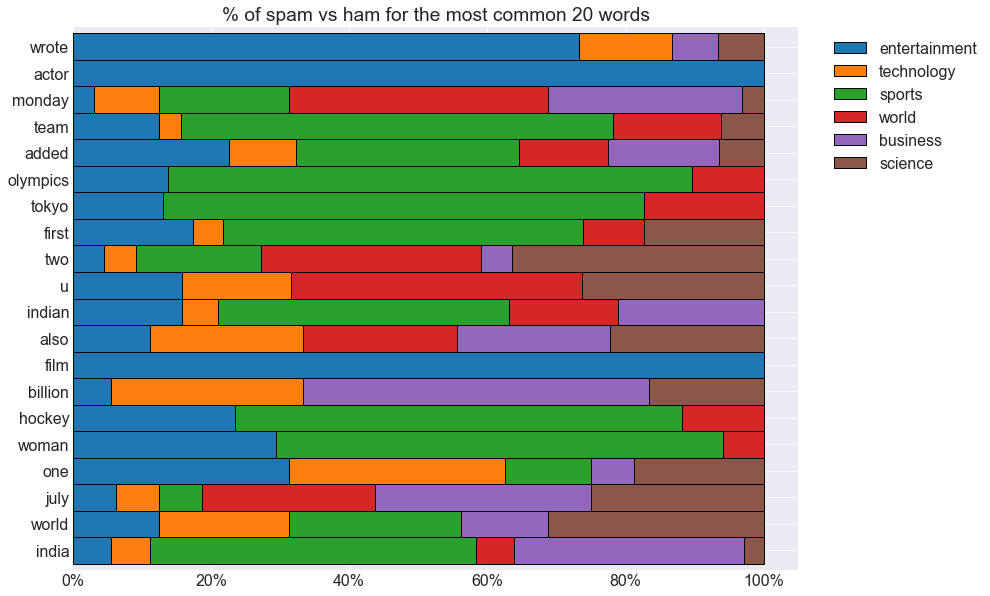

In [53]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 15))
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1).sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

<Figure size 936x576 with 0 Axes>

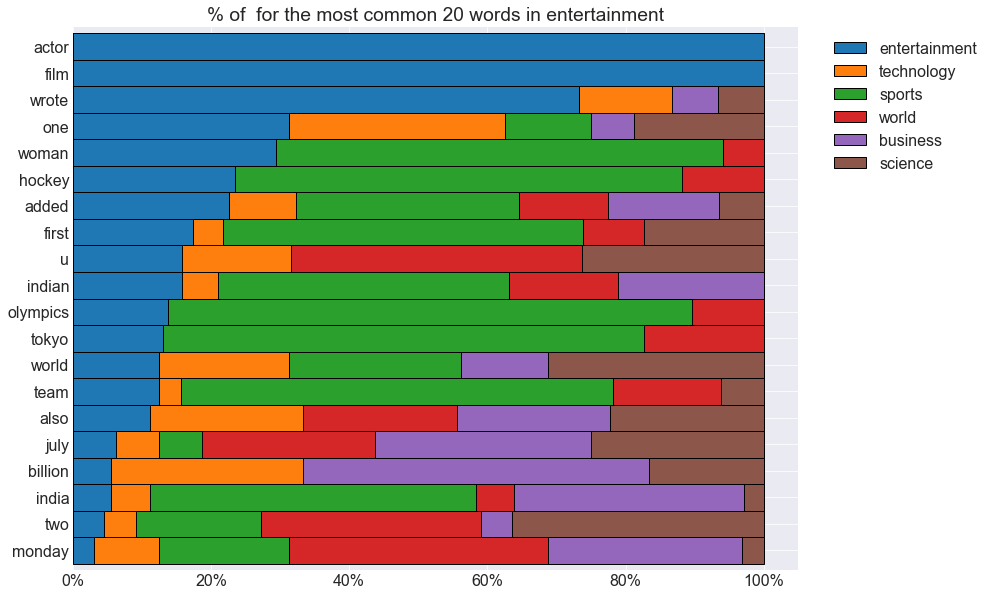

<Figure size 936x576 with 0 Axes>

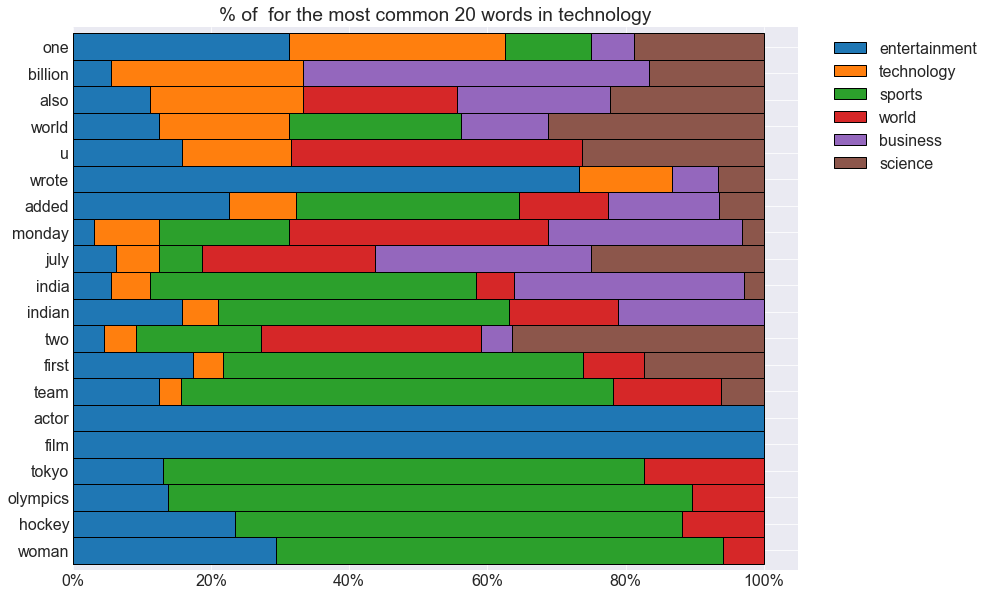

<Figure size 936x576 with 0 Axes>

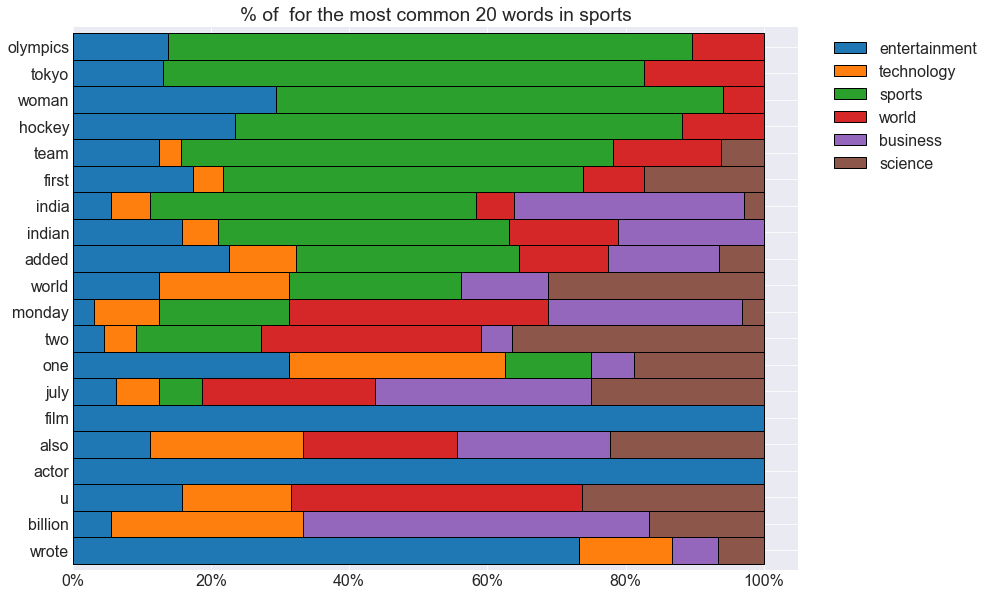

<Figure size 936x576 with 0 Axes>

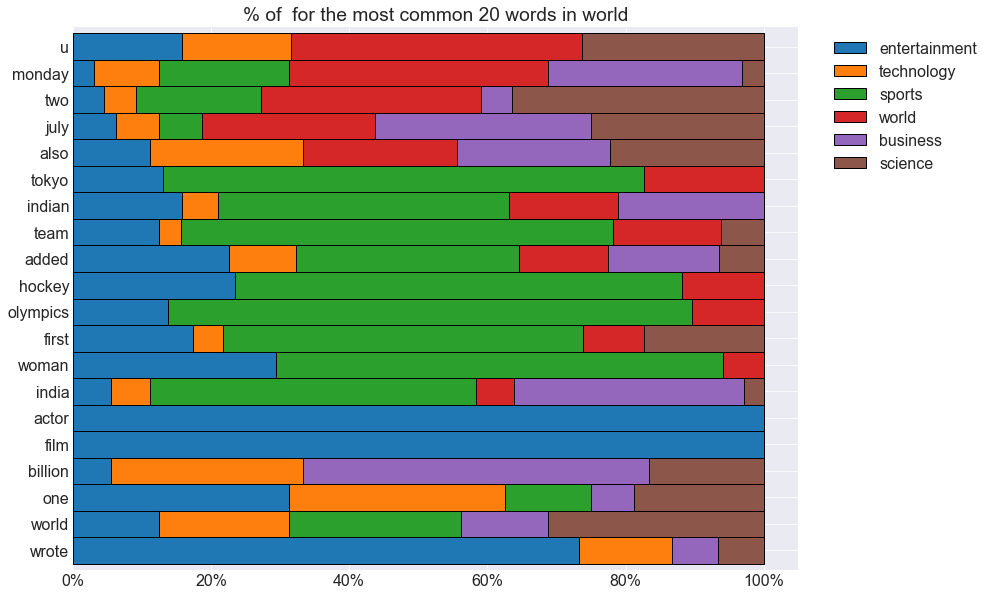

<Figure size 936x576 with 0 Axes>

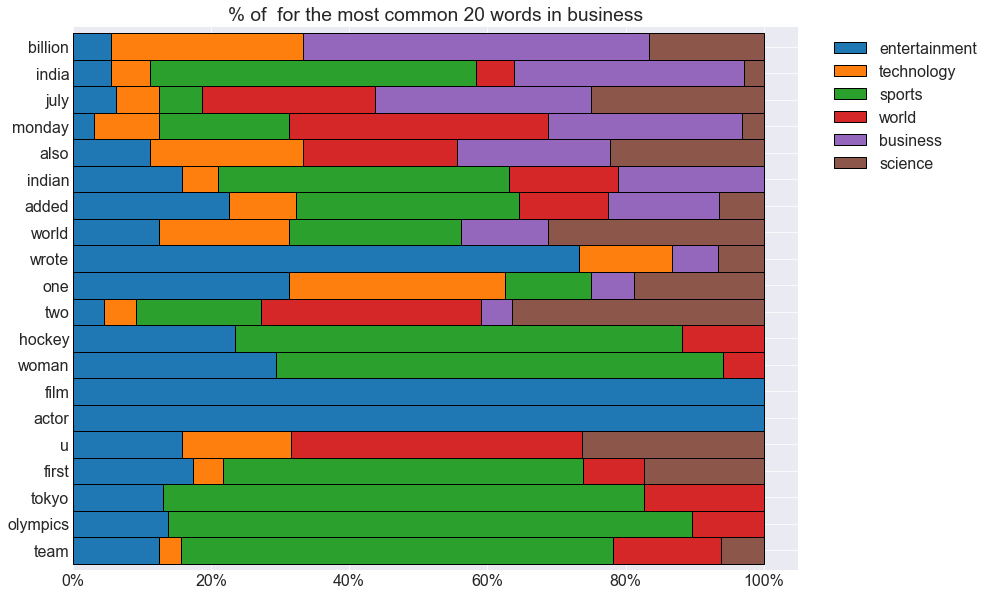

<Figure size 936x576 with 0 Axes>

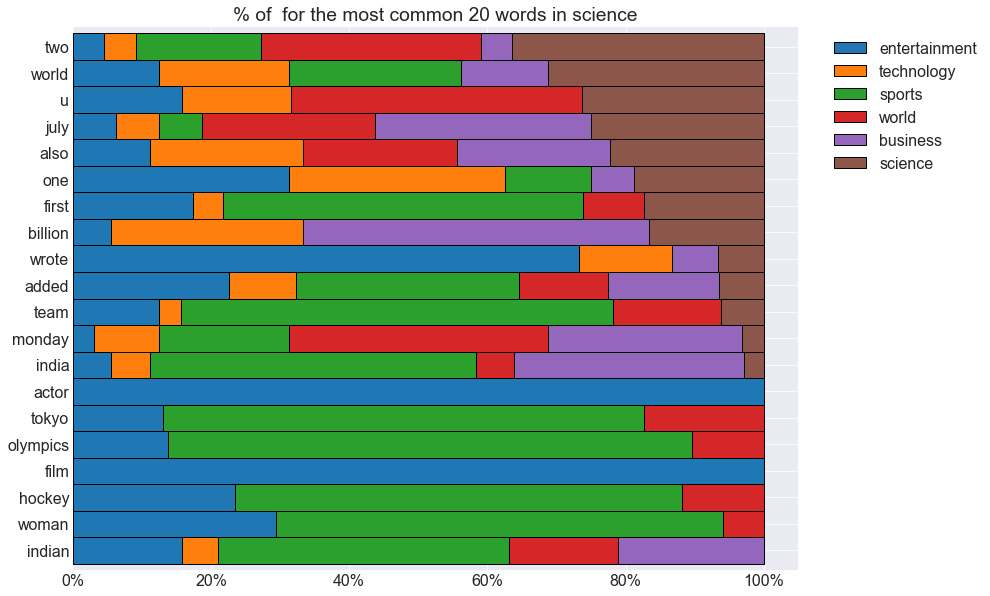

In [54]:
# Sorted by category 
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(13, 8))
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1).sort_values(by= column)
     .drop(columns='all_words')
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  for the most common 20 words in {column}')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

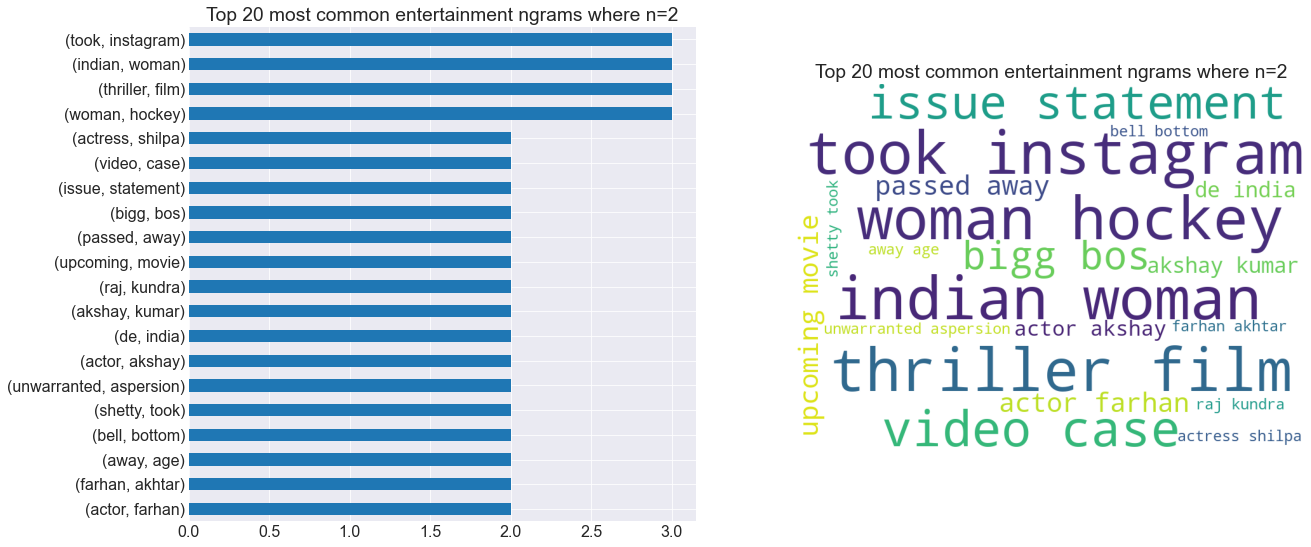

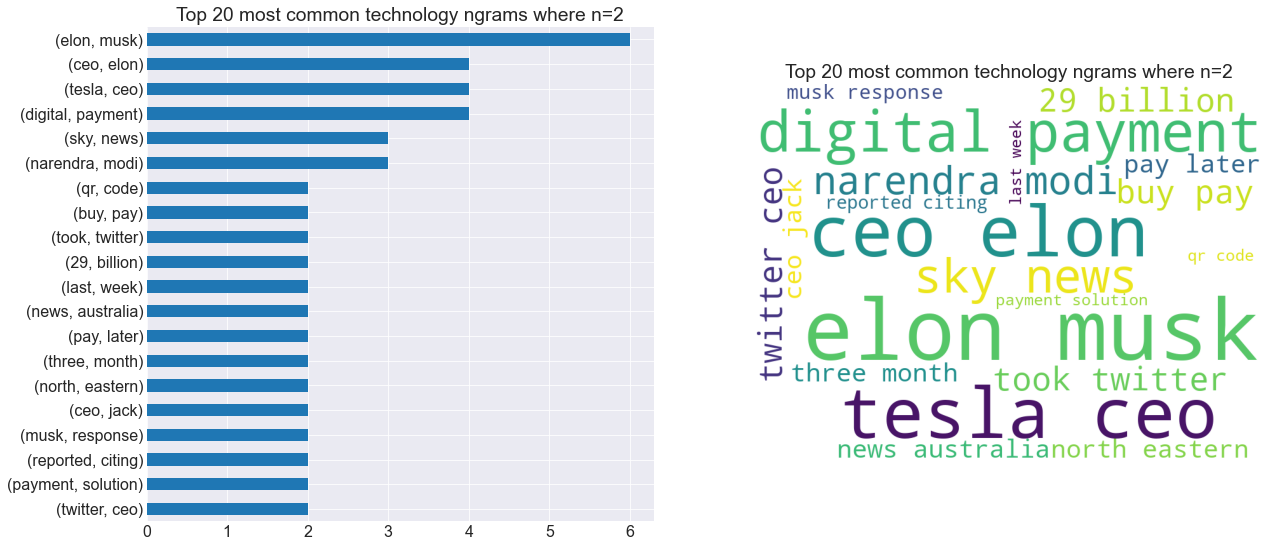

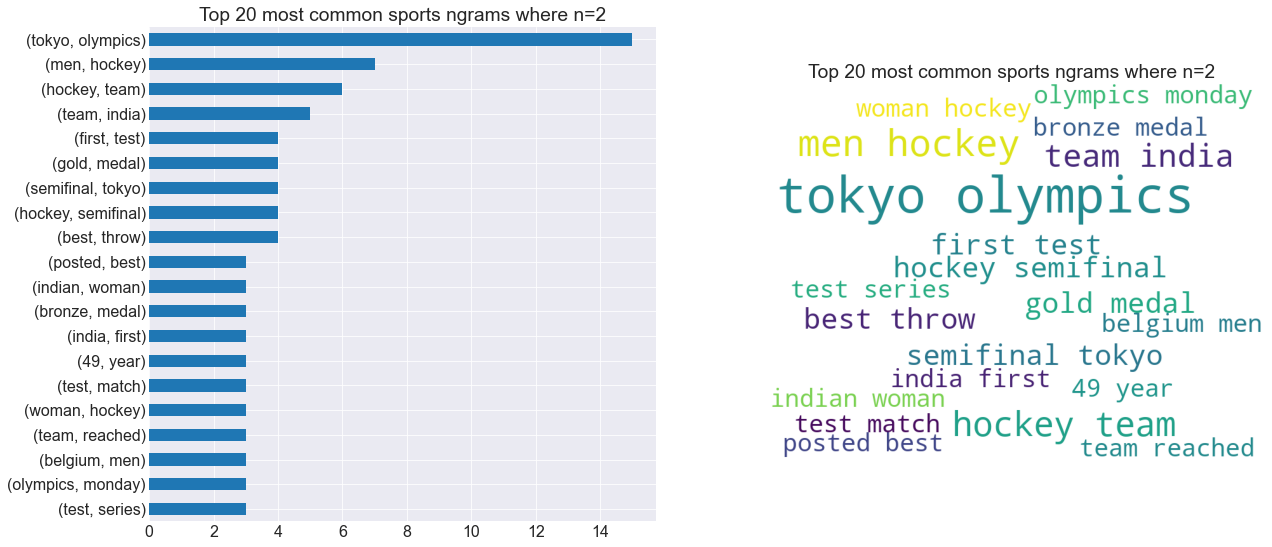

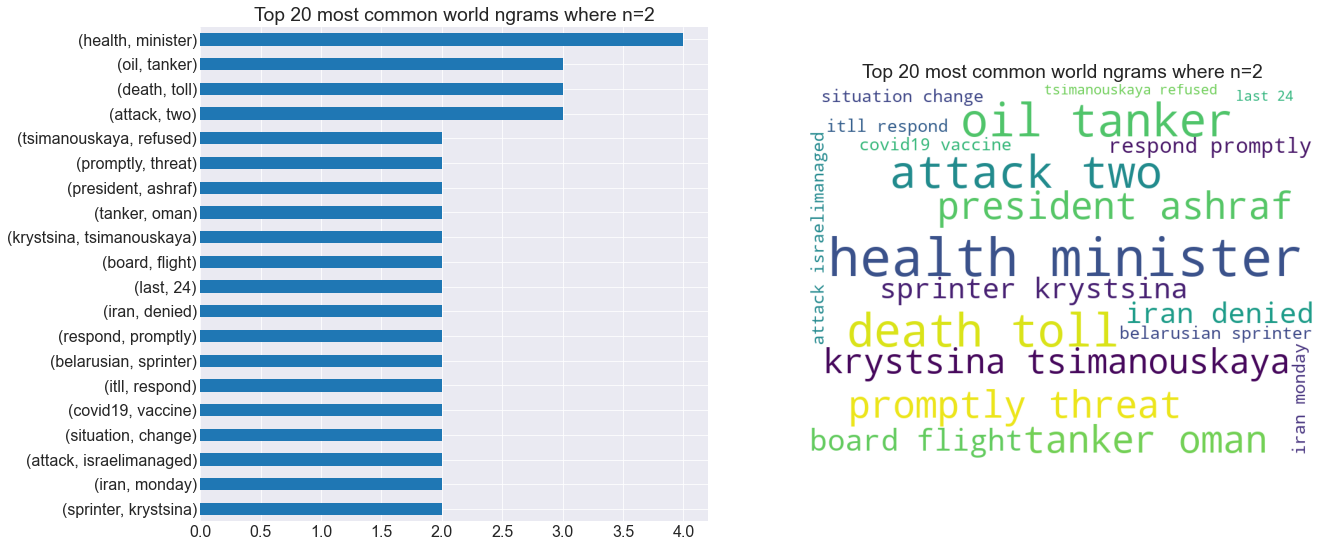

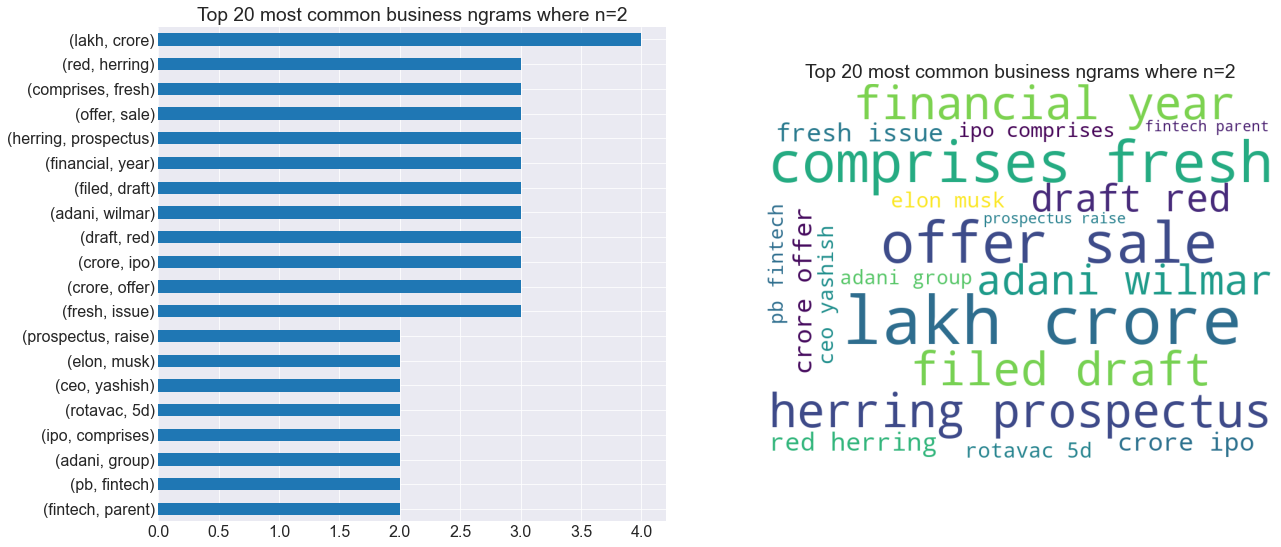

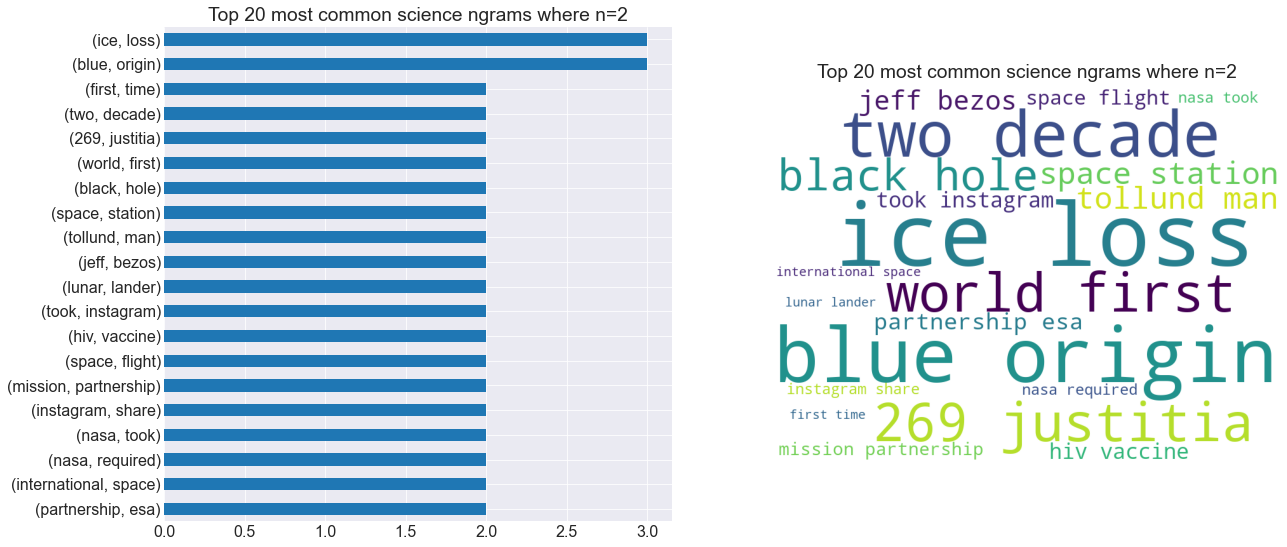

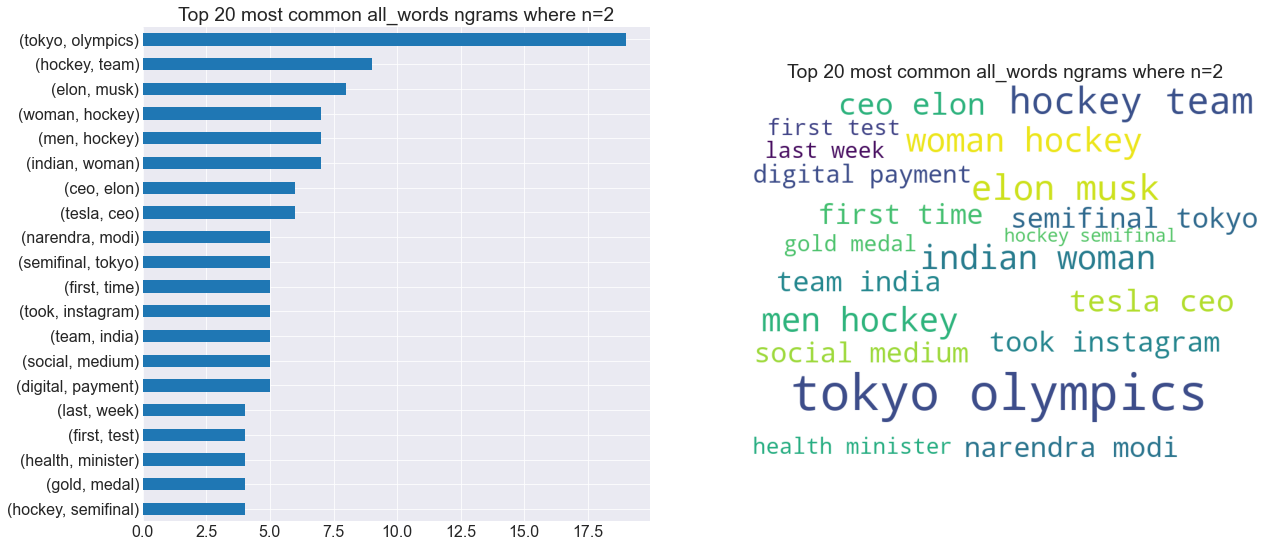

In [55]:

#use a function from explore.py
for key in join_text.keys():
    print (' ')
    ex.ngrams_wordcloud(join_text[key], key)
    print (' ')

<AxesSubplot:ylabel='Frequency'>

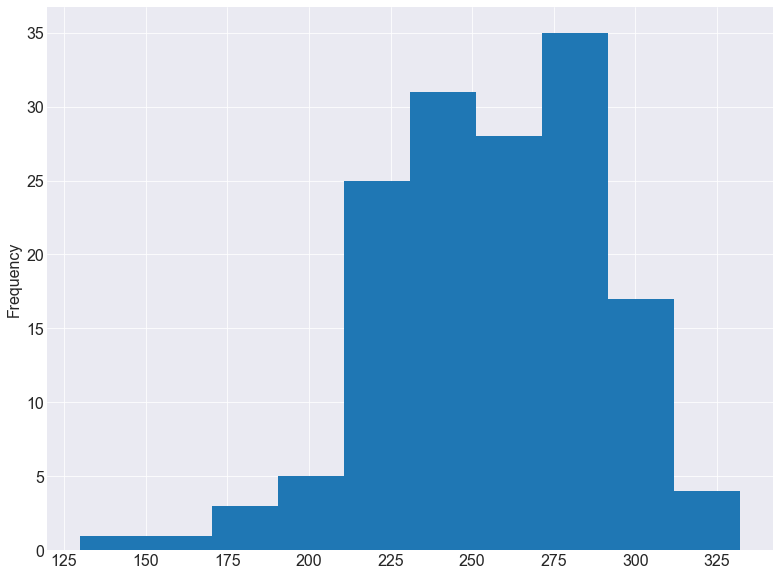

In [57]:
## new features
news_df['article_length'] = news_df.lemmatized.apply(len)

news_df.groupby('category').article_length.mean()

news_df.article_length.plot.hist()

In [58]:
news_df['word_count'] = news_df.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

<Figure size 1440x360 with 0 Axes>

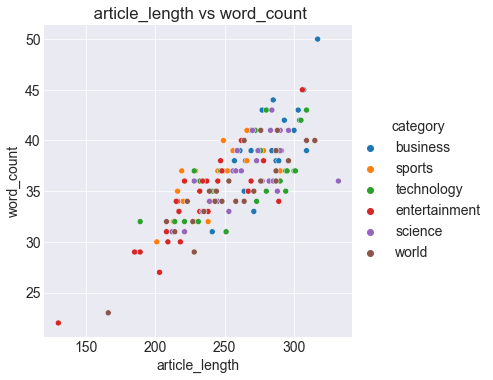

In [60]:
plt.rc('figure', figsize=(20, 10))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= (20,5))
sns.relplot(data=news_df, y='word_count', x='article_length', hue='category')
plt.title( " article_length vs word_count")
plt.show()

In [62]:
import nltk.sentiment

In [63]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [65]:
news_df['sentiment'] = news_df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])


In [66]:
news_df.head()

,title,content,category,clean,stemmed,lemmatized,article_length,word_count,sentiment
0,PM Modi launches e-RUPI digital voucher-based ...,Prime Minister Narendra Modi on Monday launche...,business,prime minister narendra modi monday launched e...,prime minist narendra modi monday launch erupi...,prime minister narendra modi monday launched e...,287,38,0.8658
1,Fire at Tesla's battery megapack in Australia ...,The fire at a Tesla battery megapack in Austra...,business,fire tesla battery megapack australia declared...,fire tesla batteri megapack australia declar c...,fire tesla battery megapack australia declared...,251,31,-0.4019
2,"High GST, acquisition cost slowing down car de...",Maruti Suzuki India Chairman RC Bhargava said ...,business,maruti suzuki india chairman rc bhargava high ...,maruti suzuki india chairman rc bhargava high ...,maruti suzuki india chairman rc bhargava high ...,265,38,0.1027
3,"Nykaa files papers to raise ₹4,000 crore throu...",Beauty unicorn Nykaa has filed its draft red h...,business,beauty unicorn nykaa filed draft red herring p...,beauti unicorn nykaa file draft red her prospe...,beauty unicorn nykaa filed draft red herring p...,257,38,0.8074
4,Govt rules out slashing of import duties on EV...,India has said it isn't planning to cut import...,business,india isnt planning cut import duties electric...,india isnt plan cut import duti electr vehicl ...,india isnt planning cut import duty electric v...,256,37,-0.0736


In [69]:
news_df.groupby('category')[['sentiment']].median()

,sentiment
category,
business,0.2960
entertainment,0.2023
science,0.1220
sports,0.6369
technology,0.3975
world,-0.4939


In [70]:
news_df.groupby('category')[['sentiment']].mean()

,sentiment
category,
business,0.291620
entertainment,0.183380
science,0.030688
sports,0.451628
technology,0.193660
world,-0.334868


In [71]:
news_df.groupby('category')[['sentiment']].min()

,sentiment
category,
business,-0.8689
entertainment,-0.8910
science,-0.8957
sports,-0.5106
technology,-0.9001
world,-0.9674


In [72]:
news_df.groupby('category')[['sentiment']].max()

,sentiment
category,
business,0.8658
entertainment,0.9553
science,0.9062
sports,0.9652
technology,0.9081
world,0.6597


In [73]:
#good news!!
news_df.nlargest(5, 'sentiment')

,title,content,category,clean,stemmed,lemmatized,article_length,word_count,sentiment
29,"Sometimes we win, sometimes we learn: Sachin a...",After 25-year-old Kamalpreet Kaur finished 6th...,sports,25yearold kamalpreet kaur finished 6th womens ...,25yearold kamalpreet kaur finish 6th women dis...,25yearold kamalpreet kaur finished 6th woman d...,278,39,0.9652
99,And she does it again: Samantha on PV Sindhu's...,Several Bollywood stars took to social media t...,entertainment,several bollywood stars took social media cong...,sever bollywood star took social media congrat...,several bollywood star took social medium cong...,269,36,0.9553
28,How does the medal tally look after today's ev...,China won five gold medals at Tokyo Olympics o...,sports,china five gold medals tokyo olympics monday t...,china five gold medal tokyo olymp monday top m...,china five gold medal tokyo olympics monday to...,220,34,0.9460
30,Wins and losses are part of life: PM as India ...,"PM Narendra Modi on Tuesday tweeted, ""Wins and...",sports,pm narendra modi tuesday tweeted wins losses p...,pm narendra modi tuesday tweet win loss part l...,pm narendra modi tuesday tweeted win loss part...,219,37,0.9313
79,"Fan makes Sonu Sood's portrait on 50,000 sq ft...",A Sonu Sood fan made a portrait of the actor o...,entertainment,sonu sood fan made portrait actor 50000 sq ft ...,sonu sood fan made portrait actor 50000 sq ft ...,sonu sood fan made portrait actor 50000 sq ft ...,247,38,0.9313


In [74]:
#bad news :(
news_df.nsmallest(5, 'sentiment')

,title,content,category,clean,stemmed,lemmatized,article_length,word_count,sentiment
138,UK summons Iranian Ambassador over Oman oil ta...,The UK has summoned the Iranian Ambassador to ...,world,uk summoned iranian ambassador london mohsen b...,uk summon iranian ambassador london mohsen bah...,uk summoned iranian ambassador london mohsen b...,239,35,-0.9674
143,Iran warns against any action over attack on s...,Iran on Monday said that it'll respond promptl...,world,iran monday itll respond promptly threat secur...,iran monday itll respond promptli threat secur...,iran monday itll respond promptly threat secur...,208,32,-0.9674
133,"Afghan forces kill over 1,300 Taliban terroris...",Afghanistan National Defence and Security Forc...,world,afghanistan national defence security forces a...,afghanistan nation defenc secur forc andsf kil...,afghanistan national defence security force an...,264,40,-0.9652
142,"Deliberate: UK, US believe Iran is responsible...",UK Foreign Secretary Dominic Raab on Sunday co...,world,uk foreign secretary dominic raab sunday conde...,uk foreign secretari domin raab sunday condemn...,uk foreign secretary dominic raab sunday conde...,287,39,-0.9643
140,Death toll from recent floods in China's Henan...,Chinese authorities on Monday said that the de...,world,chinese authorities monday death toll recent f...,chines author monday death toll recent flood c...,chinese authority monday death toll recent flo...,223,34,-0.9382
